In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet,LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [67]:
df = pd.read_csv("C:/Users/Surbhi/Desktop/3. Multi Linear Regression/ToyotaCorolla.csv",encoding="latin1")

In [68]:
df=df.drop(columns=['Id','Model'])#drop id and model columns

In [69]:
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)

Constant features: ['Cylinders']


In [70]:
df=df.drop(columns=['Cylinders'])

In [71]:
print("Any duplicates?", df.duplicated().any())

Any duplicates? True


In [72]:
df = df.drop_duplicates()

In [73]:
df.shape

(1435, 35)

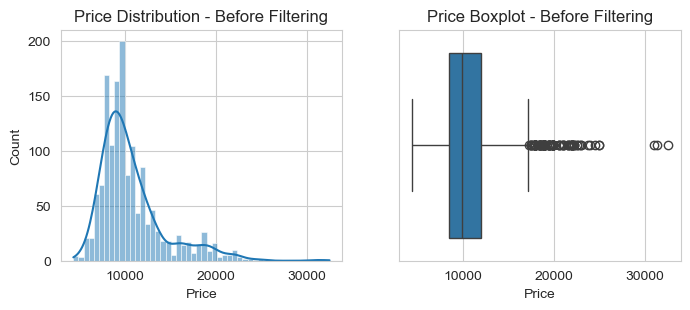

In [77]:
# Before filtering
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Price Distribution - Before Filtering")

plt.subplot(1,2,2)
sns.boxplot(x=df["Price"])
plt.title("Price Boxplot - Before Filtering")
plt.show()

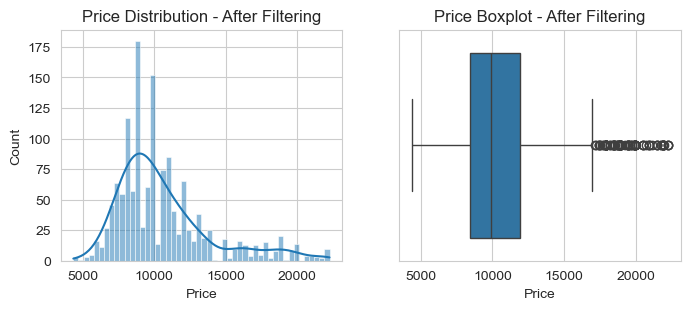

In [80]:
# Apply the filter
df = df[df["Price"].between(100, df["Price"].quantile(0.99))]

# After filtering
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Price Distribution - After Filtering")

plt.subplot(1,2,2)
sns.boxplot(x=df["Price"])
plt.title("Price Boxplot - After Filtering")
plt.show()


In [81]:
df.shape

(1422, 35)

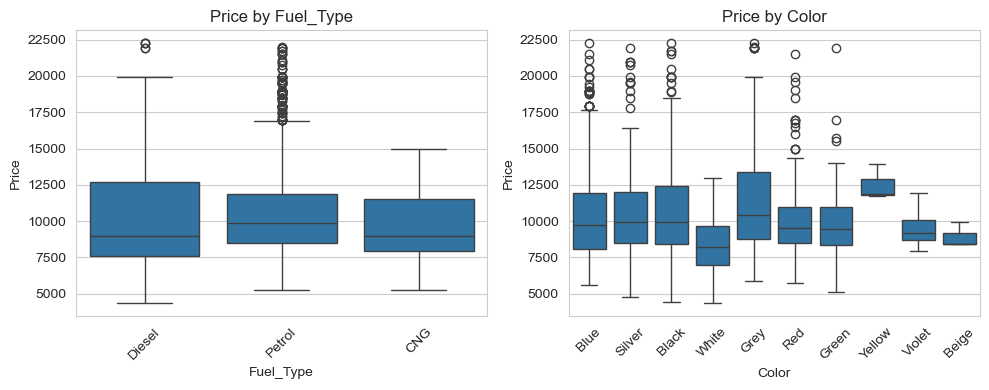

In [82]:
# Box plots for 'Price' vs categorical features
categorical_features = ['Fuel_Type', 'Color']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    sns.boxplot(x=df[col], y=df['Price'], ax=axes[i])
    axes[i].set_title(f'Price by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [85]:
from sklearn.preprocessing import OrdinalEncoder
od = OrdinalEncoder()
od.fit(df[[ "Fuel_Type", "Color"]])
df[["Fuel_Type", "Color"]] = od.transform(df[[ "Fuel_Type", "Color"]])
df.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,1.0,90,1,2.0,0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,1.0,90,1,6.0,0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,1.0,90,1,2.0,0,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,1.0,90,0,1.0,0,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,1.0,90,0,1.0,0,...,1,1,1,0,1,0,1,0,0,0


In [86]:
#apply SelectKBest class to extract top 5 best features

In [87]:
X= df.drop(columns=['Price'])
y=df['Price']

In [88]:
BestFeatures = SelectKBest(score_func=mutual_info_regression , k=5)
fit = BestFeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [89]:
#concatenating two dataframes for better visualization

f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score'] 

In [90]:
f_Scores.sort_values            # Score value is directly proportional to the feature importance

<bound method DataFrame.sort_values of                Specs     Score
0          Age_08_04  0.794023
1          Mfg_Month  0.012968
2           Mfg_Year  0.779546
3                 KM  0.290603
4          Fuel_Type  0.021321
5                 HP  0.244834
6          Met_Color  0.018367
7              Color  0.050088
8          Automatic  0.024267
9                 cc  0.158582
10             Doors  0.011252
11             Gears  0.035761
12     Quarterly_Tax  0.198739
13            Weight  0.458838
14     Mfr_Guarantee  0.071835
15   BOVAG_Guarantee  0.011596
16  Guarantee_Period  0.013242
17               ABS  0.069852
18          Airbag_1  0.000000
19          Airbag_2  0.045701
20             Airco  0.111689
21   Automatic_airco  0.116379
22     Boardcomputer  0.266288
23         CD_Player  0.126741
24      Central_Lock  0.059603
25   Powered_Windows  0.065943
26    Power_Steering  0.013189
27             Radio  0.021117
28         Mistlamps  0.038195
29       Sport_Model  0.068887


In [91]:
print(f_Scores.nlargest( 5,'Score'))

            Specs     Score
0       Age_08_04  0.794023
2        Mfg_Year  0.779546
13         Weight  0.458838
3              KM  0.290603
22  Boardcomputer  0.266288


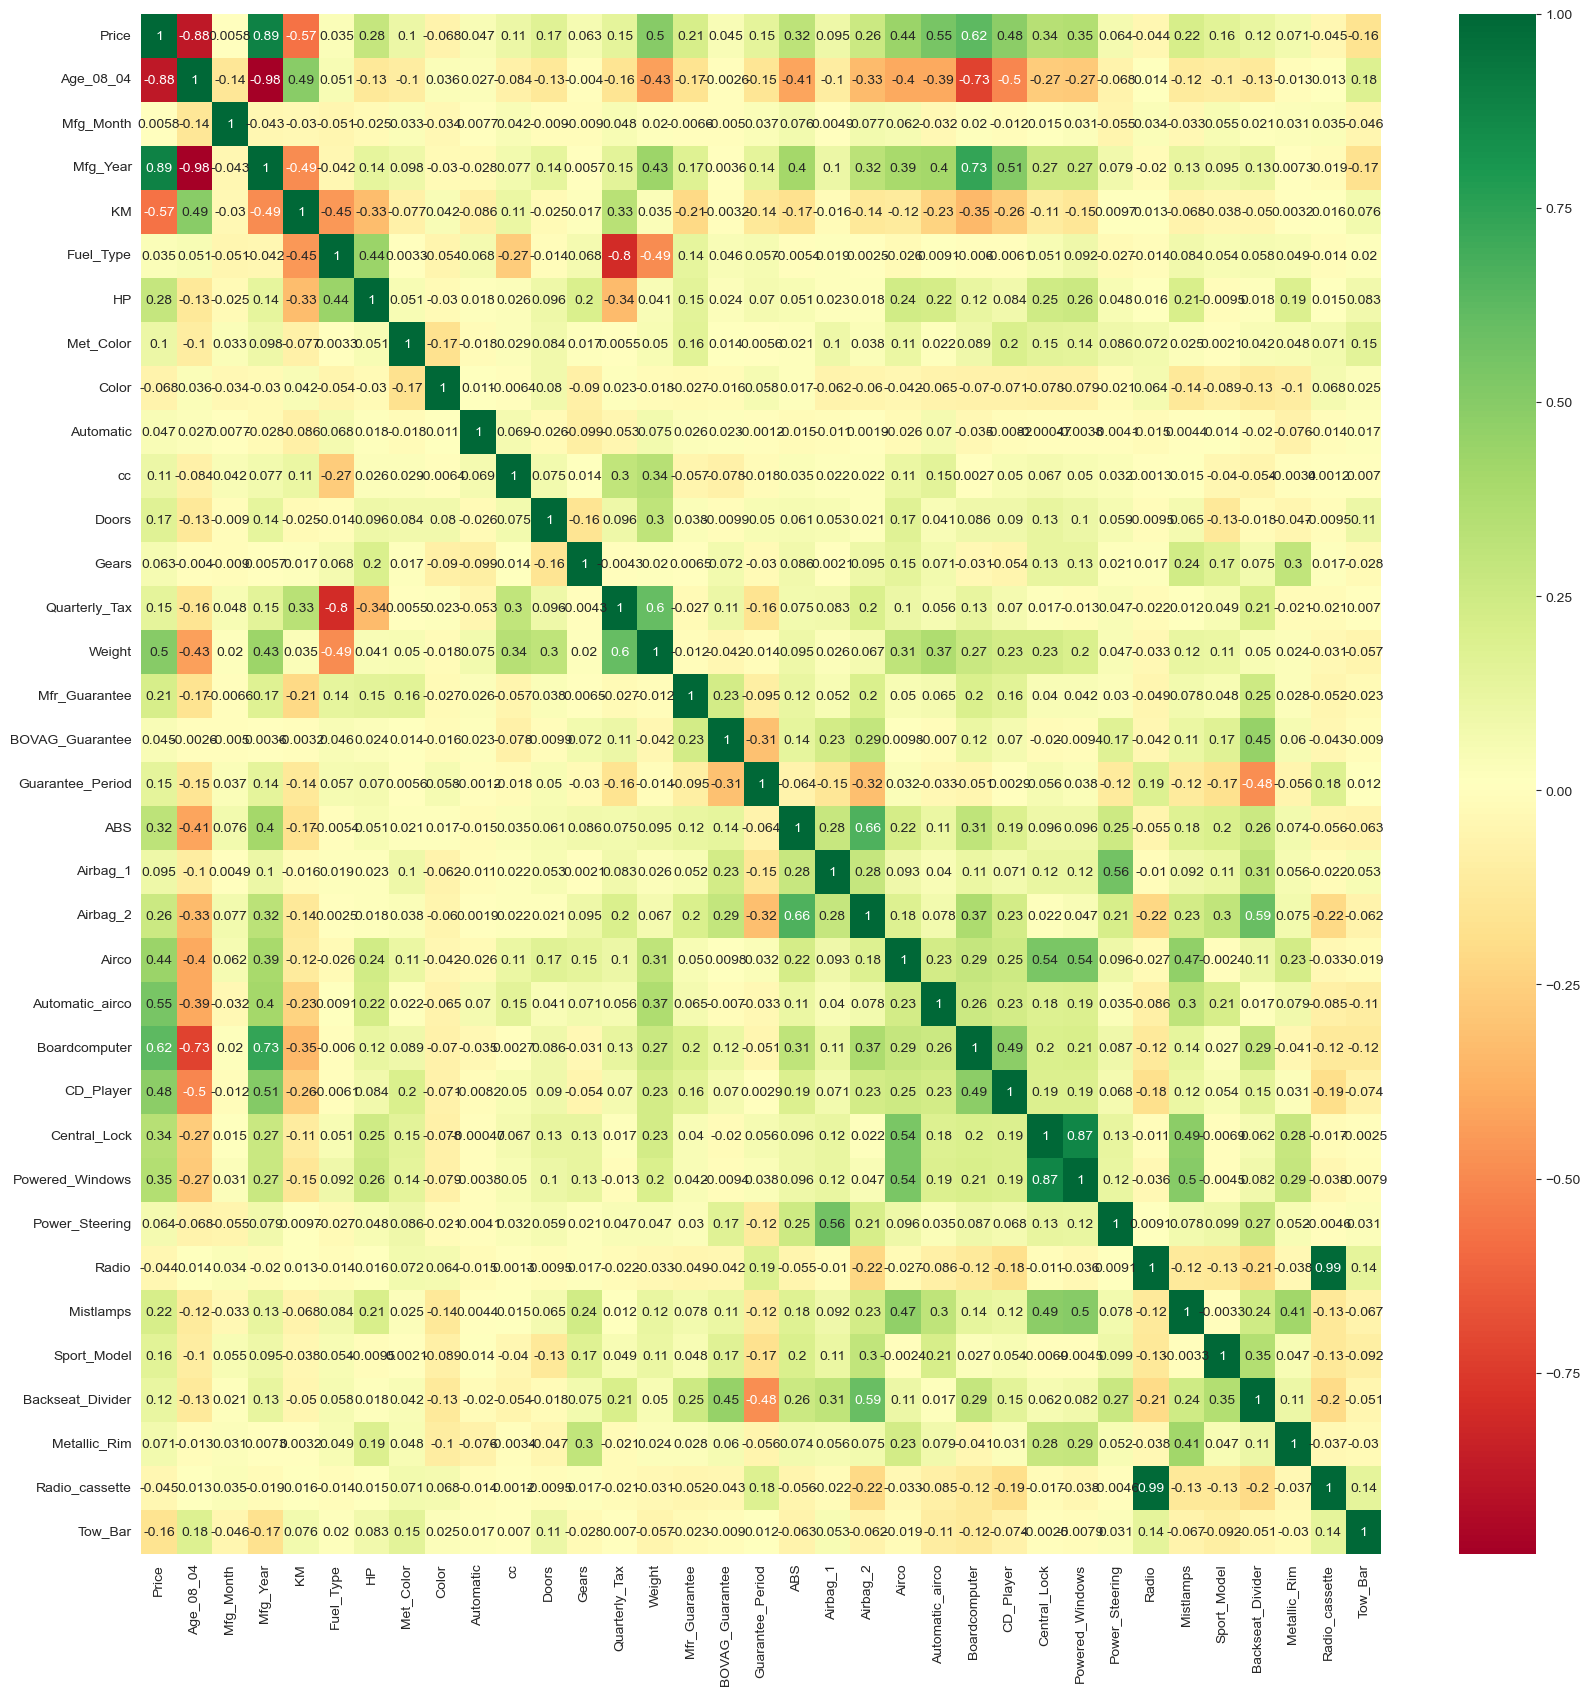

In [92]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [93]:
print(corrmat['Price'].sort_values())

Age_08_04          -0.881131
KM                 -0.566206
Tow_Bar            -0.162340
Color              -0.067977
Radio_cassette     -0.045416
Radio              -0.043909
Mfg_Month           0.005782
Fuel_Type           0.035037
BOVAG_Guarantee     0.044717
Automatic           0.046928
Gears               0.062647
Power_Steering      0.063939
Metallic_Rim        0.071255
Airbag_1            0.095122
Met_Color           0.104745
cc                  0.106897
Backseat_Divider    0.123415
Quarterly_Tax       0.146868
Guarantee_Period    0.147722
Sport_Model         0.156604
Doors               0.170540
Mfr_Guarantee       0.213890
Mistlamps           0.216646
Airbag_2            0.259519
HP                  0.283773
ABS                 0.315348
Central_Lock        0.340911
Powered_Windows     0.353986
Airco               0.435682
CD_Player           0.483930
Weight              0.500979
Automatic_airco     0.546734
Boardcomputer       0.623325
Mfg_Year            0.888308
Price         

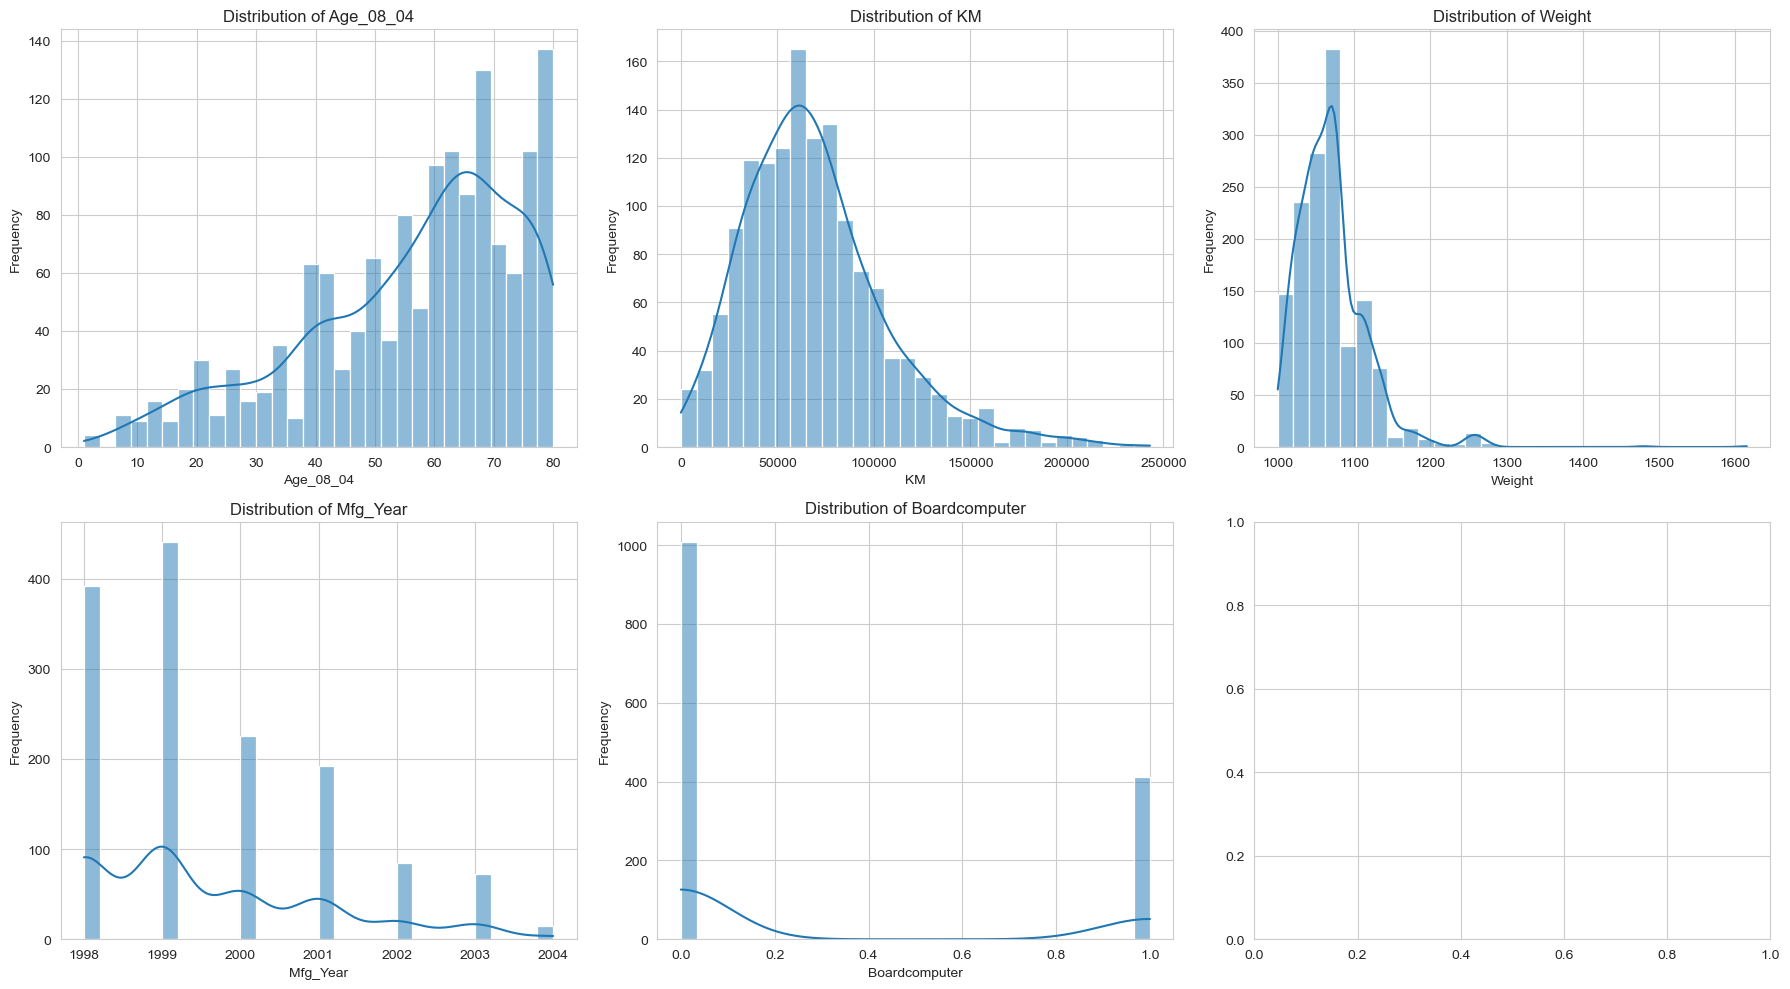

In [94]:
#Set plot style
sns.set_style("whitegrid")

numerical_features = ['Age_08_04', 'KM', 'Weight','Mfg_Year','Boardcomputer']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

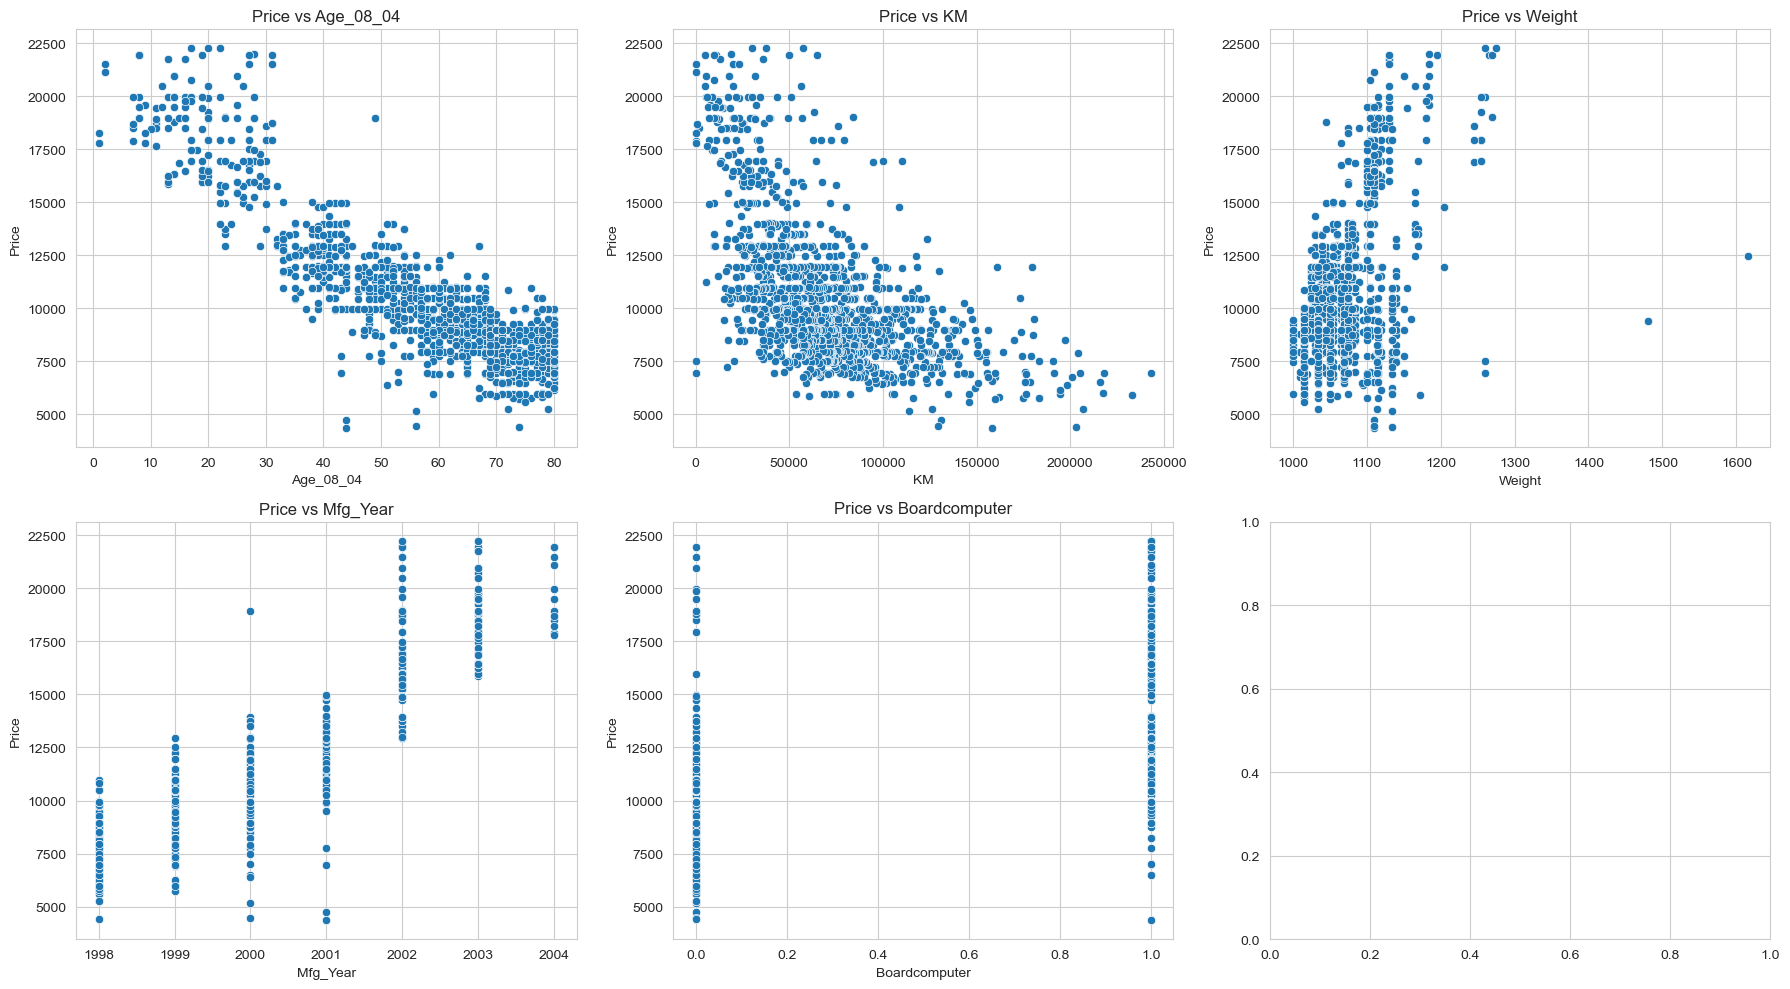

In [95]:
# 3. Scatter plots for 'Price' vs numerical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.scatterplot(x=df[col], y=df['Price'], ax=axes[i])
    axes[i].set_title(f'Price vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')
plt.tight_layout()
plt.show()


In [109]:
X= df[['Age_08_04','KM','Mfg_Year','Boardcomputer','Weight']]
y=df['Price']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state= 42
)

In [118]:
models = { "Linear Regression": LinearRegression(),
           "Ridge Regression": Ridge(alpha=5.0, random_state=42), 
           "Lasso Regression": Lasso(alpha=0.01, random_state=42, max_iter=10000),
           "ElasticNet": ElasticNet(alpha=0.05, l1_ratio=0.5, random_state=42, max_iter=10000),
         }

In [119]:
results = [] 
for name, model in models.items(): 
    # Pipeline: scaling + model 
    pipe = Pipeline([ ("scaler", StandardScaler()), 
                     ("model", model) ]) 
    pipe.fit(X_train, y_train) 
    y_pred = pipe.predict(X_test) 
    r2 = r2_score(y_test, y_pred) 
    mae = mean_absolute_error(y_test, y_pred) 
    results.append([name, r2, mae]) 
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE"])
print(results_df)

               Model  R² Score         MAE
0  Linear Regression  0.844353  916.508841
1   Ridge Regression  0.845019  914.475467
2   Lasso Regression  0.844355  916.504197
3         ElasticNet  0.845791  909.927009


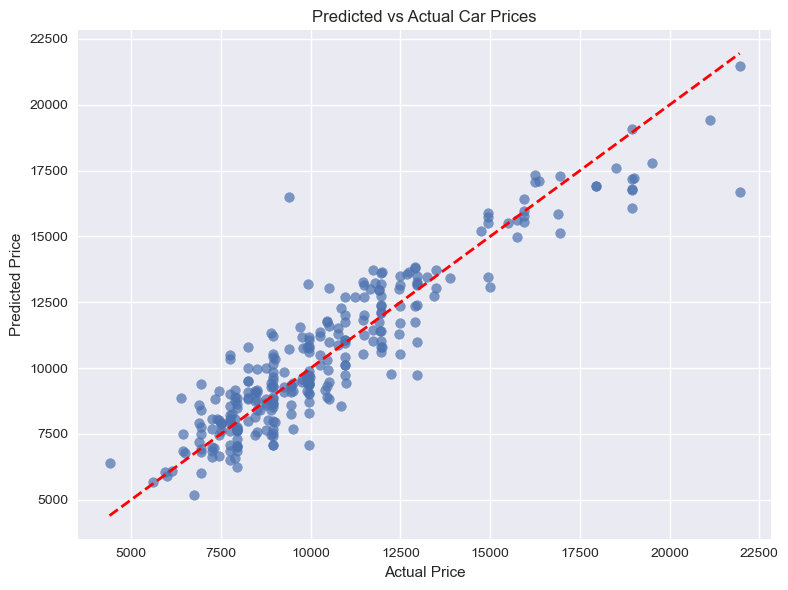

In [122]:
# Fit Gradient Boosting Regressor
model = ElasticNet(alpha=0.05, l1_ratio=0.5, random_state=42, max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot predicted vs actual prices
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Car Prices')
plt.grid(True)
plt.tight_layout()